# Proyek Klasifikasi Gambar: MangoLeafBD For Classification Of Mango Leaf Diseases
- **Nama:** Ade Ripaldi Nuralim
- **Email:** mc222d5y1277@student.devacademy.id
- **ID Dicoding:** MC222D5Y1277


## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import zipfile
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
from google.colab import drive


## Data Preparation

In [ ]:
# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

# Unzip dataset
dataset_path = "/content/drive/MyDrive/mesin/clasification_dataset/monggo.zip"

Mounted at /content/drive


In [ ]:
# Ekstrak file zip
with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
    zip_ref.extractall("/content/dataset")

# Pastikan dataset berhasil diekstrak
print("Ekstraksi selesai. File tersedia di /content/dataset")

Ekstraksi selesai. File tersedia di /content/dataset


In [ ]:
# Melihat isi folder dataset
dataset_dir = "/content/dataset"
print("Folder dalam dataset:", os.listdir(dataset_dir))


Folder dalam dataset: ['Gall Midge', 'Healthy', 'Cutting Weevil', 'Sooty Mould', 'Die Back', 'Anthracnose', 'Bacterial Canker', 'Powdery Mildew']


In [ ]:
total = sum(len(os.listdir(os.path.join(dataset_dir, label))) for label in os.listdir(dataset_dir))
print(f"\nTotal dataset: {total}")



Total dataset: 4000


### Data Preprocessing

#### Split Dataset

In [ ]:
train_dir = "/content/dataset_split/train"
val_dir = "/content/dataset_split/val"
test_dir = "/content/dataset_split/test"

from sklearn.model_selection import train_test_split
import shutil

def split_dataset(source_dir, train_dir, val_dir, test_dir, split_ratio=(0.7, 0.15, 0.15)):
    labels = os.listdir(source_dir)
    for label in labels:
        img_paths = [os.path.join(source_dir, label, fname) for fname in os.listdir(os.path.join(source_dir, label))]
        train_files, temp_files = train_test_split(img_paths, train_size=split_ratio[0], shuffle=True)
        val_files, test_files = train_test_split(temp_files, test_size=split_ratio[2]/(split_ratio[1]+split_ratio[2]))

        for path_set, target_dir in zip([train_files, val_files, test_files], [train_dir, val_dir, test_dir]):
            label_dir = os.path.join(target_dir, label)
            os.makedirs(label_dir, exist_ok=True)
            for file in path_set:
                shutil.copy(file, label_dir)

# Jalankan fungsi split
split_dataset("/content/dataset", train_dir, val_dir, test_dir)


# Preprocessing dan Augmentasi Gambar

In [ ]:
img_size = (150, 150)
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, zoom_range=0.2, shear_range=0.2, horizontal_flip=True)
val_test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical')
val_generator = val_test_datagen.flow_from_directory(val_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical')
test_generator = val_test_datagen.flow_from_directory(test_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical', shuffle=False)


Found 3640 images belonging to 8 classes.
Found 1116 images belonging to 8 classes.
Found 1115 images belonging to 8 classes.


## Modelling

# CNN

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(train_generator.class_indices), activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# LATIH MODEL

In [ ]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=50
)

# Evaluasi pada test set
test_loss, test_acc = model.evaluate(test_generator)
print("Test Accuracy:", test_acc)


Epoch 1/50
114/114 ━━━━━━━━━━━━━━━━━━━━ 214s 2s/step - accuracy: 0.2406 - loss: 1.8592 - val_accuracy: 0.6478 - val_loss: 1.0157
Epoch 2/50
114/114 ━━━━━━━━━━━━━━━━━━━━ 259s 2s/step - accuracy: 0.5929 - loss: 1.1240 - val_accuracy: 0.7849 - val_loss: 0.6224
Epoch 3/50
114/114 ━━━━━━━━━━━━━━━━━━━━ 215s 2s/step - accuracy: 0.6874 - loss: 0.8293 - val_accuracy: 0.8360 - val_loss: 0.4406
Epoch 4/50
114/114 ━━━━━━━━━━━━━━━━━━━━ 257s 2s/step - accuracy: 0.7399 - loss: 0.6794 - val_accuracy: 0.8772 - val_loss: 0.3802
Epoch 5/50
114/114 ━━━━━━━━━━━━━━━━━━━━ 207s 2s/step - accuracy: 0.7940 - loss: 0.5823 - val_accuracy: 0.8271 - val_loss: 0.4517
Epoch 6/50
114/114 ━━━━━━━━━━━━━━━━━━━━ 208s 2s/step - accuracy: 0.8294 - loss: 0.4947 - val_accuracy: 0.8835 - val_loss: 0.3080
Epoch 7/50
114/114 ━━━━━━━━━━━━━━━━━━━━ 214s 2s/step - accuracy: 0.8595 - loss: 0.3964 - val_accuracy: 0.9435 - val_loss: 0.1942
Epoch 8/50
114/114 ━━━━━━━━━━━━━━━━━━━━ 208s 2s/step - accuracy: 0.8844 - loss: 0.3220 - val_accu

## Evaluasi dan Visualisasi

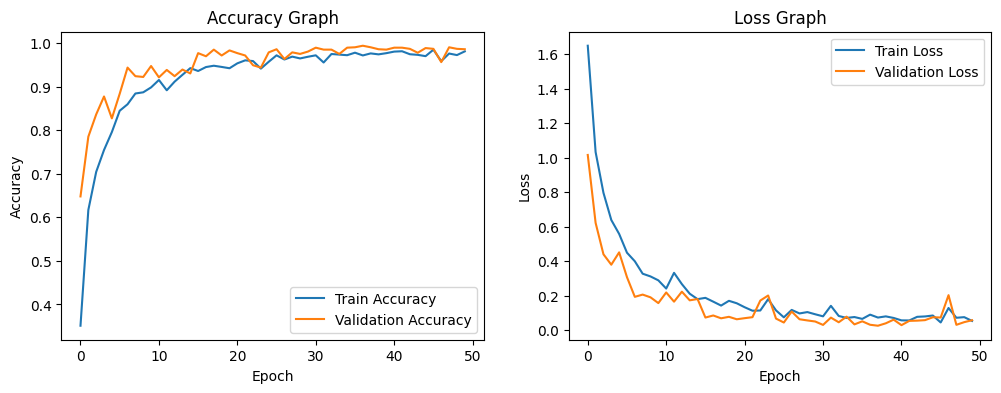

In [ ]:
# Plot akurasi dan loss selama training
plt.figure(figsize=(12, 4))

# Akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Graph')

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Graph')

plt.show()


# CONVOLUTION MATRIX

In [ ]:
# Confusion Matrix & Classification Report
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes
labels = list(train_generator.class_indices.keys())

print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=labels))

print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred_classes))

35/35 ━━━━━━━━━━━━━━━━━━━━ 18s 520ms/step
Classification Report:
                  precision    recall  f1-score   support

     Anthracnose       1.00      0.99      0.99       140
Bacterial Canker       0.99      0.99      0.99       137
  Cutting Weevil       1.00      1.00      1.00       138
        Die Back       0.99      1.00      0.99       136
      Gall Midge       0.99      0.99      0.99       138
         Healthy       1.00      0.99      1.00       141
  Powdery Mildew       0.95      1.00      0.97       144
     Sooty Mould       1.00      0.95      0.97       141

        accuracy                           0.99      1115
       macro avg       0.99      0.99      0.99      1115
    weighted avg       0.99      0.99      0.99      1115

Confusion Matrix:
[[138   0   0   2   0   0   0   0]
 [  0 135   0   0   2   0   0   0]
 [  0   0 138   0   0   0   0   0]
 [  0   0   0 136   0   0   0   0]
 [  0   0   0   0 137   0   1   0]
 [  0   0   0   0   0 140   1   0]
 [  0   

## Konversi Model

In [ ]:
pip install tensorflowjs==4.12.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.2/89.2 kB 3.7 MB/s eta 0:00:00
  Attempting uninstall: tensorflowjs
    Found existing installation: tensorflowjs 4.22.0
    Uninstalling tensorflowjs-4.22.0:
      Successfully uninstalled tensorflowjs-4.22.0


In [ ]:
import os
import tensorflowjs as tfjs

# Membuat folder tujuan di Google Drive
os.makedirs("/content/drive/MyDrive/mesin/tfjs_model", exist_ok=True)
os.makedirs("/content/drive/MyDrive/mesin/tflite", exist_ok=True)
os.makedirs("/content/drive/MyDrive/mesin/saved_model", exist_ok=True)

# 1. Simpan model untuk TensorFlow.js
tfjs.converters.save_keras_model(model, "/content/drive/MyDrive/mesin/tfjs_model")

# 2. Simpan model untuk TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
with open("/content/drive/MyDrive/mesin/tflite/model.tflite", "wb") as f:
    f.write(tflite_model)

# Simpan label
labels = list(train_generator.class_indices.keys())  # pastikan daftar label tersedia
with open("/content/drive/MyDrive/mesin/tflite/label.txt", "w") as f:
    f.write("\n".join(labels))


failed to lookup keras version from the file,
    this is likely a weight only file
Saved artifact at '/tmp/tmp0csnynaw'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 8), dtype=tf.float32, name=None)
Captures:
  139314730533520: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139314730534288: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139314730533904: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139314730537168: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139314730536400: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139314730538128: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139314730537552: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139314730538512: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139314730538896: TensorSpec(shape=(), dtype=tf.resource, name=None)
  

In [ ]:
model.export("/content/drive/MyDrive/mesin/saved_model")


Saved artifact at '/content/drive/MyDrive/mesin/saved_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 8), dtype=tf.float32, name=None)
Captures:
  139314730533520: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139314730534288: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139314730533904: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139314730537168: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139314730536400: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139314730538128: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139314730537552: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139314730538512: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139314730538896: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139314730540432: TensorSpec(shape=(), dtype=tf.resource, nam

## Inference (Optional)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


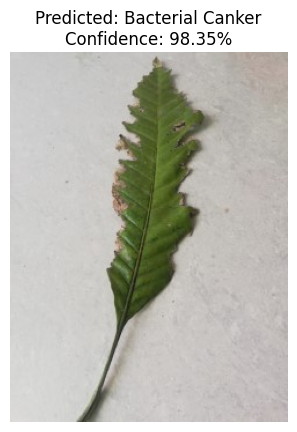


Prediction probabilities:
Anthracnose: 0.0000
Bacterial Canker: 0.9835
Cutting Weevil: 0.0000
Die Back: 0.0000
Gall Midge: 0.0150
Healthy: 0.0003
Powdery Mildew: 0.0000
Sooty Mould: 0.0012


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image


# Class labels (should match your training data)
class_labels = ['Anthracnose', 'Bacterial Canker', 'Cutting Weevil', 'Die Back',
                'Gall Midge', 'Healthy', 'Powdery Mildew', 'Sooty Mould']

def preprocess_image(img_path, target_size=(150, 150)):
    """Load and preprocess an image for prediction"""
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Normalize like during training
    return img_array

def predict_disease(img_path, model, class_labels):
    """Make a prediction on a single image"""
    # Preprocess the image
    processed_img = preprocess_image(img_path)

    # Make prediction
    predictions = model.predict(processed_img)
    predicted_class_index = np.argmax(predictions[0])
    confidence = np.max(predictions[0])
    predicted_class = class_labels[predicted_class_index]

    # Display results
    img = image.load_img(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predicted: {predicted_class}\nConfidence: {confidence:.2%}")
    plt.show()

    # Print detailed probabilities
    print("\nPrediction probabilities:")
    for i, prob in enumerate(predictions[0]):
        print(f"{class_labels[i]}: {prob:.4f}")

    return predicted_class, confidence

image_path = "/content/dataset_split/test/Bacterial Canker/IMG_20211106_120934 (Custom).jpg"
predicted_class, confidence = predict_disease(image_path, model, class_labels)

TESTING TFLITE MODEL INTERFACE

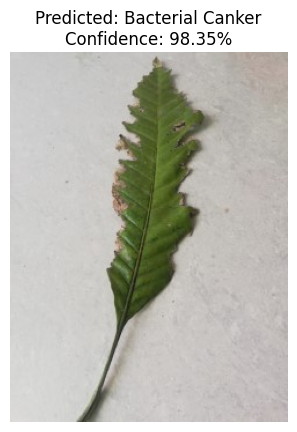

In [ ]:
def tflite_inference(img_path, tflite_model_path, class_labels):
    """Perform inference using a TFLite model"""
    # Load TFLite model and allocate tensors
    interpreter = tf.lite.Interpreter(model_path=tflite_model_path)
    interpreter.allocate_tensors()

    # Get input and output tensors
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()

    # Preprocess image
    processed_img = preprocess_image(img_path)

    # Set the tensor to point to the input data
    interpreter.set_tensor(input_details[0]['index'], processed_img)

    # Run inference
    interpreter.invoke()

    # Get results
    predictions = interpreter.get_tensor(output_details[0]['index'])
    predicted_class_index = np.argmax(predictions[0])
    confidence = np.max(predictions[0])
    predicted_class = class_labels[predicted_class_index]

    # Display results
    img = image.load_img(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predicted: {predicted_class}\nConfidence: {confidence:.2%}")
    plt.show()

    return predicted_class, confidence

tflite_model_path = "/content/drive/MyDrive/mesin/tflite/model.tflite"
predicted_class, confidence = tflite_inference(image_path, tflite_model_path, class_labels)

Interpretasi

**Hasil Pelatihan dan Validasi**
* Akurasi Training Akhir (Epoch 50): 97.36%

* Akurasi Validasi Tertinggi: 99.01% (terjadi pada beberapa epoch seperti epoch 37, 41, 48)

* Loss Validasi Terendah: 0.0270 (Epoch 38)

Ini menunjukkan bahwa model mengalami generalization yang baik, dan tidak overfitting walaupun akurasinya sangat tinggi.

**Hasil Pengujian (Test Set)**

Akurasi Pengujian: 98.83%

**testing pada gambar interface**
* Bacterial Canker: 98.35%

* Gall Midge: 1.50%

* Sooty Mould: 0.12%

* Lainnya: Sangat kecil (≤ 0.03%)

* Ini menunjukkan model sangat percaya diri dengan klasifikasi yang diberikan.

Kesimpulan

Model telah berhasil dilatih dengan sangat baik untuk mengenali diagnosis penyakit pada tanaman mangga berbasis citra daun, dengan tingkat akurasi yang sangat tinggi.